**目录**


# **一、爬取信息**


## **1.1 获取二手房信息**


## **1.2 获取租房信息**


# **二、处理数据**


## **2.1 合并数据**


## **2.2 分析数据**


## **2.3 计算房价租金比**


# **三、模型建立与预测**


## **3.1 模型建立**


## **3.2 模型预测**


## **3.3 房价租金比可视化**






# 1.1 获取二手房信息

In [ ]:
from selenium import webdriver
import pandas as pd
from time import sleep
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException


def next_page(driver):
    try:
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
    except NoSuchElementException:
        print("NoSuchElementException")


def extract_page_data(driver):
    data = []
    houses = driver.find_elements(By.CSS_SELECTOR, 'dl.clearfix')

    for house in houses:
        try:
            title = house.find_element(By.CSS_SELECTOR, "h4.clearfix a[title]").get_attribute("title")
            house_info = house.find_element(By.CSS_SELECTOR, 'p.tel_shop').text
            info_div = [x.strip() for x in house_info.split("|") if x.strip()]
            community = house.find_element(By.CSS_SELECTOR, 'p.add_shop a').get_attribute('title')
            address = house.find_element(By.CSS_SELECTOR, 'p.add_shop span').text
            price = house.find_element(By.CSS_SELECTOR, "dd.price_right")
            total_price = price.find_element(By.CSS_SELECTOR, "b").text.strip()
            unit_price = price.find_elements(By.CSS_SELECTOR, "span")[-1].text.strip()

            item = {
                '标题': title,
                '户型': info_div[0]if len(info_div) > 0 else '',
                '面积': info_div[1]if len(info_div) > 1 else '',
                '层数': info_div[2]if len(info_div) > 2 else '',
                '朝向': info_div[3]if len(info_div) > 3 else '',
                '建成时间': info_div[4]if len(info_div) > 4 else '',
                '小区': community,
                '地址': address,
                '总价（万）': total_price,
                '单位价格': unit_price
            }
            data.append(item)

        except Exception as e:
            print(f'解析房源信息时出错: {e}')
            continue

        return data


def save_data(data, filename, is_first_page=False):
    df = pd.DataFrame(data)

    if is_first_page:
        df.to_csv(filename, mode='w', index=False, encoding='utf_8_sig', header=True)
    else:
        df.to_csv(filename, mode='a', index=False, encoding='utf_8_sig', header=False)


def main():
    driver = webdriver.Edge()
    url = 'https://esf.fang.com/house-a015277-b02314/'
    filename = 'xisanqi_esf_price.csv'
    first_page = True

    driver.get(url)
    sleep(10)

    page_data = extract_page_data(driver)
    save_data(page_data, filename, is_first_page=first_page)
    print("第1页数据处理完成")

    for i in range(2,11):
        next_page(driver)
        sleep(10)
        page_data = extract_page_data(driver)
        save_data(page_data, filename)
        print(f"第{i}页数据处理完成")
    print("前10页处理完成,已生成csv文件")
    driver.quit()


if __name__ == '__main__':
    main()

第1页数据处理完成

第2页数据处理完成

第3页数据处理完成

第4页数据处理完成

第5页数据处理完成

第6页数据处理完成

第7页数据处理完成

第8页数据处理完成

第9页数据处理完成

NoSuchElementException

第10页数据处理完成

前10页处理完成,已生成csv文件


进程已结束，退出代码为 0

# 1.2 获取租房信息

In [ ]:
from selenium import webdriver
import pandas as pd
from time import sleep
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException


def next_page(driver):
    try:
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
    except NoSuchElementException:
        print("NoSuchElementException")

def extract_house_data(driver):
    data = []
    houses = driver.find_elements(By.CSS_SELECTOR, 'dl.list.hiddenMap.rel')

    for house in houses:
        try:

            title = house.find_element(By.CSS_SELECTOR, 'p.title a').get_attribute('title')
            house_info = house.find_element(By.CSS_SELECTOR, 'p.font15.mt12.bold').text
            info_div = [x.strip() for x in house_info.split("|") if x.strip()]
            community = house.find_element(By.CSS_SELECTOR, 'a[target="_blank"] span').text
            price = house.find_element(By.CSS_SELECTOR, 'span.price').text

            item = {
                '标题': title,
                '户型': info_div[0] if len(info_div) > 0 else '',
                '合租': info_div[1] if len(info_div) > 1 else '',
                '面积': info_div[2] if len(info_div) > 2 else '',
                '朝向': info_div[3] if len(info_div) > 3 else '',
                '小区': community,
                '月租': price
            }

            data.append(item)

        except Exception as e:
            print(f'解析房源信息时出错: {e}')
            continue

    return data




def save_data(data, filename, is_first_page=False):
    df = pd.DataFrame(data)

    if is_first_page:
        df.to_csv(filename, mode='w', index=False, encoding='utf_8_sig', header=True)
    else:
        df.to_csv(filename, mode='a', index=False, encoding='utf_8_sig', header=False)


def main():
    driver = webdriver.Edge()
    url = 'https://zu.fang.com/house-a015277-b02314/'
    filename = 'xisanqi_zufang_price.csv'
    first_page = True

    driver.get(url)
    sleep(10)

    page_data = extract_house_data(driver)
    save_data(page_data, filename, is_first_page=first_page)
    print("第1页数据处理完成")

    for i in range(2,11):
        next_page(driver)
        sleep(10)
        page_data =extract_house_data(driver)
        save_data(page_data, filename)
        print(f"第{i}页数据处理完成")
    print("前10页处理完成,已生成csv文档")
    driver.quit()


if __name__ == '__main__':
    main()

第1页数据处理完成

第2页数据处理完成

第3页数据处理完成

第4页数据处理完成

第5页数据处理完成

第6页数据处理完成

第7页数据处理完成

第8页数据处理完成

第9页数据处理完成

NoSuchElementException

第10页数据处理完成

前10页处理完成,已生成csv文件


进程已结束，退出代码为 0

# 2.1 合并数据

合并二手房数据

In [ ]:
import pandas as pd

# 读取四个 Excel 文件
file1 = pd.read_excel('qinghe_esf.xlsx')
file2 = pd.read_excel('shangdi_esf.xlsx')
file3 = pd.read_excel('xierqi_esf.xlsx')
file4 = pd.read_excel('xisanqi_esf.xlsx')

# 添加 location 列
file1['location'] = '清河'
file2['location'] = '上地'
file3['location'] = '西二旗'
file4['location'] = '西三旗'

# 使用 pd.concat 直接拼接
merged_data = pd.concat([file1, file2, file3, file4], ignore_index=True)

# 将结果保存为新的 Excel 文件
merged_data.to_excel('merged_esf.xlsx', index=False)

print("四个文件已成功合并并保存")

四个文件已成功合并并保存

合并租房数据

In [ ]:
import pandas as pd

# 读取四个 Excel 文件
file1 = pd.read_excel('qinghe_zufang.xlsx')
file2 = pd.read_excel('shangdi_zufang.xlsx')
file3 = pd.read_excel('xierqi_zufang.xlsx')
file4 = pd.read_excel('xisanqi_zufang.xlsx')

# 添加 location 列
file1['location'] = '清河'
file2['location'] = '上地'
file3['location'] = '西二旗'
file4['location'] = '西三旗'

# 使用 pd.concat 直接拼接
merged_data = pd.concat([file1, file2, file3, file4], ignore_index=True)

# 将结果保存为新的 Excel 文件
merged_data.to_excel('merged_zufang.xlsx', index=False)

print("四个文件已成功合并并保存")

四个文件已成功合并并保存

# 2.2 分析数据

分析二手房数据

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# 读取合并后的数据
data = pd.read_excel('merged_zufang.xlsx')

# 检查价格和面积的异常值

# 使用IQR方法检查异常值
def check_outliers_iqr(data, column):
    # 计算第一四分位数(Q1)和第三四分位数(Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # 计算IQR
    IQR = Q3 - Q1
    
    # 定义异常值的范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 识别异常值
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers

# 使用Z-Score方法检查异常值
def check_outliers_zscore(data, column):
    # 计算Z-Score
    z_scores = stats.zscore(data[column])
    
    # 设定阈值为3，表示Z-Score大于3的值视为异常值
    outliers = data[np.abs(z_scores) > 3]
    
    return outliers

# 按照location分组，检查每个location下的price和area
location_groups = data.groupby('location')

for location, group in location_groups:
    print(f"检查 {location} 区域的异常值：")
    
    # 检查 'price' 的异常值
    print("\n使用IQR方法检查 price 的异常值：")
    price_outliers_iqr = check_outliers_iqr(group, 'price')
    print(price_outliers_iqr[['price', 'area', 'location']])

    print("\n使用Z-Score方法检查 price 的异常值：")
    price_outliers_zscore = check_outliers_zscore(group, 'price')
    print(price_outliers_zscore[['price', 'area', 'location']])

    # 检查 'area' 的异常值
    print("\n使用IQR方法检查 area 的异常值：")
    area_outliers_iqr = check_outliers_iqr(group, 'area')
    print(area_outliers_iqr[['price', 'area', 'location']])

    print("\n使用Z-Score方法检查 area 的异常值：")
    area_outliers_zscore = check_outliers_zscore(group, 'area')
    print(area_outliers_zscore[['price', 'area', 'location']])
    
    print("\n" + "="*50)  # 分隔线

分析租房数据

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# 读取合并后的数据
data = pd.read_excel('merged_zufang.xlsx')


# 检查价格和面积的异常值

# 使用IQR方法检查异常值
def check_outliers_iqr(data, column):
    # 计算第一四分位数(Q1)和第三四分位数(Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # 计算IQR
    IQR = Q3 - Q1

    # 定义异常值的范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 识别异常值
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers


# 使用Z-Score方法检查异常值
def check_outliers_zscore(data, column):
    # 计算Z-Score
    z_scores = stats.zscore(data[column])

    # 设定阈值为3，表示Z-Score大于3的值视为异常值
    outliers = data[np.abs(z_scores) > 3]

    return outliers


# 按照location分组，检查每个location下的price和area
location_groups = data.groupby('location')

for location, group in location_groups:
    print(f"检查 {location} 区域的异常值：")

    # 检查 'price' 的异常值
    print("\n使用IQR方法检查 price 的异常值：")
    price_outliers_iqr = check_outliers_iqr(group, 'price')
    print(price_outliers_iqr[['price', 'area', 'location']])

    print("\n使用Z-Score方法检查 price 的异常值：")
    price_outliers_zscore = check_outliers_zscore(group, 'price')
    print(price_outliers_zscore[['price', 'area', 'location']])

    # 检查 'area' 的异常值
    print("\n使用IQR方法检查 area 的异常值：")
    area_outliers_iqr = check_outliers_iqr(group, 'area')
    print(area_outliers_iqr[['price', 'area', 'location']])

    print("\n使用Z-Score方法检查 area 的异常值：")
    area_outliers_zscore = check_outliers_zscore(group, 'area')
    print(area_outliers_zscore[['price', 'area', 'location']])

    print("\n" + "=" * 50)  # 分隔线

# 2.3 计算房价租金比

In [ ]:
import pandas as pd

# 读取两个 Excel 文件
esf_data = pd.read_excel('merged_esf.xlsx')
zufang_data = pd.read_excel('merged_zufang.xlsx')

# 计算 'unit_price' 和 'unit_rent'，分别为 price/area 和 price/area
esf_data['unit_price'] = esf_data['price'] / esf_data['area']
zufang_data['unit_rent'] = zufang_data['price'] / zufang_data['area']

# 保持 location 列
esf_data['location'] = esf_data['location']
zufang_data['location'] = zufang_data['location']

# 合并数据，保留每个 location 的 unit_price 和 unit_rent
merged_data = pd.merge(esf_data[['location', 'unit_price']], zufang_data[['location', 'unit_rent']], on='location', how='outer')

# 计算每个房源的房价租金比
merged_data['price_rent_ratio'] = merged_data['unit_price'] / merged_data['unit_rent']

# 针对每个区域计算房价租金比的中位数，并乘以 10000
result = merged_data.groupby('location')['price_rent_ratio'].median() * 10000

# 输出四个地区房价租金比的中位数
print(result)

上地     921.038672

清河     891.299034

西三旗    766.156946

西二旗    697.676553

画出条形图

In [ ]:

import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或者使用 'Songti SC' 或其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 区域和房价租金比中位数数据
locations = ['上地', '清河', '西三旗', '西二旗']
price_rent_ratio_median = [921.038672, 891.299034, 766.156946, 697.676553]

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(locations, price_rent_ratio_median, color='skyblue')

# 添加标题和标签
plt.title('每个区域的房价租金比中位数', fontsize=14)
plt.xlabel('区域', fontsize=12)
plt.ylabel('房价租金比 (单位: 万)', fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()

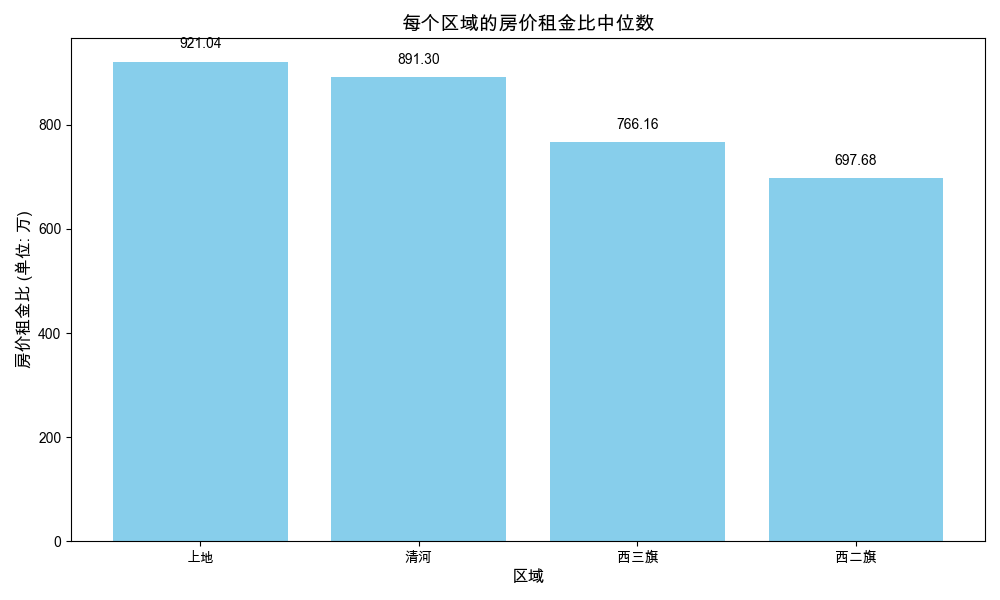

In [47]:
from IPython.display import Image
Image(filename="/Users/zihexu/Downloads/aaa.jpg",width=800,height=1000)


# 3.1 模型建立

针对二手房

In [ ]:
import pandas as pd
import statsmodels.api as sm

esf_data = pd.read_excel('merged_esf.xlsx')

# 清除缺失值
esf_data = esf_data.dropna()

# 计算每平方米价格
esf_data['unit_price'] = esf_data['price'] / esf_data['area']
esf_data['area'] = esf_data['area'].astype(float)

# 定义所有区域，确保每个区域的虚拟变量都会生成
all_locations = ['清河', '上地', '西二旗', '西三旗']

# 确保location列包含所有类别
esf_data['location'] = pd.Categorical(esf_data['location'], categories=all_locations)

# 生成虚拟变量（不删除任何类别，以确保所有区域都能生成虚拟变量列）
esf_data = pd.get_dummies(esf_data, columns=['location'], drop_first=False, prefix='location')

# 构造交互项 m2 × location
location_columns = [col for col in esf_data.columns if col.startswith('location_')]
for col in location_columns:
    esf_data[f'm2_{col}'] = esf_data['area'] * esf_data[col]

# 确保所有虚拟变量列为整数类型
for col in location_columns:
    esf_data[col] = esf_data[col].astype(int)

# 针对每个区域分别进行回归分析
for region in all_locations:
    # 自变量：面积，区域虚拟变量，面积与区域虚拟变量的交互项
    X_price = esf_data[['area', f'location_{region}', f'm2_location_{region}']]
    y_price = esf_data['unit_price']

    # 添加常数项（截距）
    X_price = sm.add_constant(X_price)

    # 使用最小二乘法进行回归分析
    model_price = sm.OLS(y_price, X_price).fit()

    # 打印回归结果
    print(f"回归结果 —— {region}（价格模型）：")
    print(model_price.summary())
    print("\n" + "="*50 + "\n")

针对租房

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 读取二手房数据 (merged_esf.xlsx)
esf_data = pd.read_excel('merged_zufang.xlsx')

# 清除缺失值
esf_data = esf_data.dropna()

# 计算每平方米价格
esf_data['unit_rent'] = esf_data['price'] / esf_data['area']
esf_data['area'] = esf_data['area'].astype(float)

# 定义所有区域，确保每个区域的虚拟变量都会生成
all_locations = ['清河', '上地', '西二旗', '西三旗']

# 确保location列包含所有类别
esf_data['location'] = pd.Categorical(esf_data['location'], categories=all_locations)

# 生成虚拟变量（不删除任何类别，以确保所有区域都能生成虚拟变量列）
esf_data = pd.get_dummies(esf_data, columns=['location'], drop_first=False, prefix='location')

# 构造交互项 m2 × location
location_columns = [col for col in esf_data.columns if col.startswith('location_')]
for col in location_columns:
    esf_data[f'm2_{col}'] = esf_data['area'] * esf_data[col]

# 确保所有虚拟变量列为整数类型
for col in location_columns:
    esf_data[col] = esf_data[col].astype(int)

# 针对每个区域分别进行回归分析
for region in all_locations:
    # 自变量：面积，区域虚拟变量，面积与区域虚拟变量的交互项
    X_price = esf_data[['area', f'location_{region}', f'm2_location_{region}']]
    y_price = esf_data['unit_rent']

    # 添加常数项（截距）
    X_price = sm.add_constant(X_price)

    # 使用最小二乘法进行回归分析
    model_price = sm.OLS(y_price, X_price).fit()

    # 打印回归结果
    print(f"回归结果 —— {region}（价格模型）：")
    print(model_price.summary())
    print("\n" + "="*50 + "\n")

# 3.2 模型预测

In [ ]:
import pandas as pd

# 定义预测的面积值
m2_values = [50, 100]

# 存储预测结果
predictions = []

# 提取回归模型的系数（从打印结果中提取）
coefficients = {
    "清河": {"const": 9.9398, "area": -0.0071, "location": 0.5489, "interaction": 0.0097},
    "上地": {"const": 9.0425, "area": 0.0045, "location": 4.5663, "interaction": -0.0309},
    "西二旗": {"const": 10.7059, "area": -0.0013, "location": -4.2216, "interaction": 0.0092},
    "西三旗": {"const": 10.1893, "area": -0.0008, "location": -4.4294, "interaction": 0.0124},
}

# 计算预测价格
for region, coef in coefficients.items():
    for m2 in m2_values:
        predicted_price = (
            coef["const"] +
            coef["area"] * m2 +
            coef["location"] * 1 +  
            coef["interaction"] * m2
        )
        predictions.append({"区域": region, "面积": m2, "预测单价(万）": predicted_price})

# 转换为 DataFrame
predictions_df = pd.DataFrame(predictions)

# 打印预测结果
print(predictions_df)

 区域   面积     预测单价(万)
 
0   清河   50  10.6187

1   清河  100  10.7487

2   上地   50  12.2888

3   上地  100  10.9688

4  西二旗   50   6.8793

5  西二旗  100   7.2743

6  西三旗   50   6.3399

7  西三旗  100   6.9199


In [ ]:
import pandas as pd

# 定义预测的面积值
m2_values = [50, 100]

# 存储预测结果
predictions_rent = []

# 提取回归模型的系数（从打印结果中提取）
coefficients_rent = {
    "清河": {"const": 122.9423, "area": -0.1270, "location": -43.8242, "interaction": 1.5007},
    "上地": {"const": 131.2439, "area": 0.1807, "location": 9.9947, "interaction": -0.5346},
    "西二旗": {"const": 129.9469, "area": 0.1532, "location": -3.3933, "interaction": -0.2978},
    "西三旗": {"const": 117.0177, "area": 0.3500, "location": -13.6375, "interaction": -0.3941},
}

# 计算预测租金
for region, coef in coefficients_rent.items():
    for m2 in m2_values:
        predicted_rent = (
            coef["const"] +
            coef["area"] * m2 +
            coef["location"] * 1 +  # 该区域的虚拟变量始终为1
            coef["interaction"] * m2  # 交互项
        )
        predictions_rent.append({"区域": region, "面积": m2, "预测租金": predicted_rent})

# 转换为 DataFrame
predictions_rent_df = pd.DataFrame(predictions_rent)

# 打印预测结果
print(predictions_rent_df)

  区域   面积      预测租金

0   清河   50  147.8031

1   清河  100  216.4881

2   上地   50  123.5436

3   上地  100  105.8486

4  西二旗   50  119.3236

5  西二旗  100  112.0936

6  西三旗   50  101.1752

7  西三旗  100   98.9702

# 3.3 房价租金比可视化

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
plt.rcParams['axes.unicode_minus'] = False

price_df = pd.DataFrame(price_data)
rent_df = pd.DataFrame(rent_data)

# 乘以10000来得到每平方米房价
price_df["预测单价"] = price_df["预测单价"] * 10000

# 计算房价租金比
price_rent_ratio = []

for region in price_df['区域'].unique():
    price = price_df[price_df['区域'] == region]
    rent = rent_df[rent_df['区域'] == region]
    
    for m2 in [50, 100]:
        price_value = price[price['面积'] == m2]["预测单价"].values[0]
        rent_value = rent[rent['面积'] == m2]["预测租金"].values[0]

        ratio = price_value / rent_value
        price_rent_ratio.append({"区域": region, "面积": m2, "房价租金比": ratio})

# 转换为 DataFrame
ratio_df = pd.DataFrame(price_rent_ratio)


colors = ['#1f77b4', '#ff7f0e']  
bars = []  
plt.figure(figsize=(10, 6))

# 创建条形图，按区域和面积分组
for idx, region in enumerate(ratio_df['区域'].unique()):
    region_data = ratio_df[ratio_df['区域'] == region]
    
    for m2_idx, m2 in enumerate([50, 100]):
        bar = plt.bar(region + f' {m2}㎡', region_data[region_data['面积'] == m2]['房价租金比'], 
                      color=colors[m2_idx])
        bars.append(bar)

# 设置标题和标签
plt.title('不同区域的房价租金比', fontsize=14)
plt.xlabel('区域和面积', fontsize=12)
plt.ylabel('房价租金比', fontsize=12)

# 在每个柱子上显示数值
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height + 20, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10)

# 自定义图例
plt.legend(['50㎡', '100㎡'], title='面积')

# 显示图形
plt.tight_layout()
plt.show()

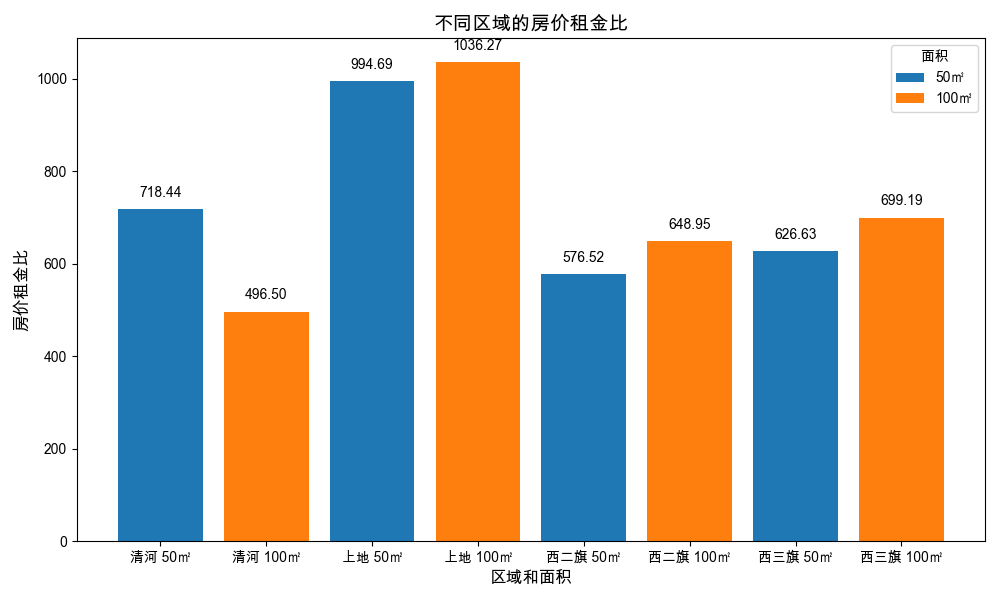

In [33]:
from IPython.display import Image
Image(filename="/Users/zihexu/Downloads/aab.jpg",width=800,height=1000)
